In [1]:
%tensorflow_version 2.x
#!pip show tensorflow

TensorFlow 2.x selected.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [0]:
import numpy as np
import cv2
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [0]:
from tensorflow.keras.models import load_model
path = './gdrive/My Drive/Colab Notebooks/English-Character-Recognition'
model=load_model(os.path.join(path, 'cnn_model-10-epochs.h5'))

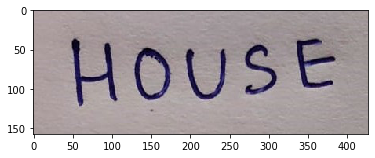

In [5]:
img = mpimg.imread(os.path.join(path, 'house2.jpeg'))
plt.imshow(img)

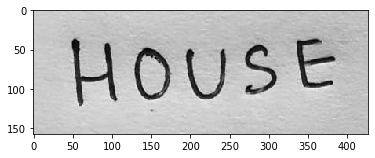

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #Converting to GrayScale
plt.imshow(gray, cmap='gray')

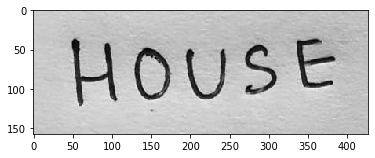

In [7]:
kernel = np.ones((5,5),np.uint8)
#gray = cv2.dilate(gray , kernel, iterations = 1)
plt.imshow(gray, cmap='gray')

In [0]:
#img = mpimg.imread('20.jpg')
h, w = img.shape[:2]
image_size = h*w
mser = cv2.MSER_create()
mser.setMaxArea(int(image_size/2))
mser.setMinArea(10)

gray_copy = np.copy(gray)
_, bw = cv2.threshold(gray_copy, 0.0, 255.0, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

regions, rects = mser.detectRegions(bw)
for (x, y, w, h) in rects:
    cv2.rectangle(gray_copy, (x, y), (x+w, y+h), color=(0, 0, 255), thickness=3)

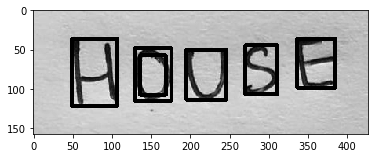

In [9]:
plt.imshow(gray_copy, cmap='gray')

In [10]:
print(rects)

[[ 49  36  58  86]
 [336  36  49  63]
 [270  44  41  63]
 [195  50  51  64]
 [129  48  47  67]
 [136  57  33  51]]


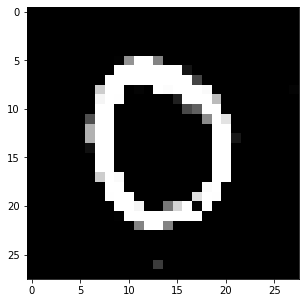

In [11]:
i = 4
crop_img1 = gray[rects[i][1]-20:rects[i][1]+rects[i][3]+20, rects[i][0]-20:rects[i][0]+rects[i][2]+20]
ret, thresh_img = cv2.threshold(crop_img1, 127.5, 255, cv2.THRESH_BINARY_INV)
crop_img = cv2.resize(thresh_img, (28, 28))
plt.figure(figsize = (5,5))
plt.imshow(crop_img, cmap='gray')
plt.show()

In [0]:
crop_img = crop_img.reshape(1, 28, 28, 1)
crop_img = np.asarray(crop_img, np.float)
crop_img /= 255

In [13]:
pred1=model.predict(crop_img)
maxi = np.argmax(pred1)
print(maxi)

14


In [0]:
images = []
for i in range(len(rects)):
    if rects[i][3] >= 30 and rects[i][2] >= 30:
        crop_img1 = gray[rects[i][1]-20:rects[i][1]+rects[i][3]+20, rects[i][0]-20:rects[i][0]+rects[i][2]+20]
        ret, thresh_img = cv2.threshold(crop_img1, 127.5, 255, cv2.THRESH_BINARY_INV)
        crop_img = cv2.resize(thresh_img, (28, 28))
        images.append(crop_img)

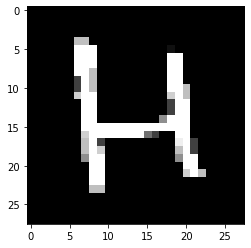

In [15]:
plt.imshow(images[0], cmap='gray')

In [0]:
images_copy = np.asarray(images, np.float)
images_copy = images_copy.reshape(len(images), 28, 28, 1)
images_copy /= 255

In [17]:
pred=model.predict(images_copy)
print(pred[0])

[1.3740932e-07 6.1914642e-26 1.8063054e-19 1.1289473e-20 1.1673716e-37
 0.0000000e+00 1.9727525e-19 9.9999988e-01 0.0000000e+00 8.2832328e-18
 3.5967351e-09 7.8902988e-18 2.3189303e-08 1.4785710e-09 1.0569278e-15
 1.0569843e-15 5.3862928e-29 4.9621814e-21 3.3473669e-18 9.4458226e-12
 2.0723940e-11 6.4024204e-26 9.5794319e-12 8.2643000e-17 5.0281002e-10
 4.6464593e-31]


In [0]:
import pandas as pd
pred_dataframe = pd.DataFrame(pred)

In [19]:
print(pred_dataframe)

             0             1   ...            24            25
0  1.374093e-07  6.191464e-26  ...  5.028100e-10  4.646459e-31
1  1.006482e-18  1.325421e-09  ...  8.765316e-16  2.621838e-10
2  1.627761e-30  5.241830e-13  ...  7.769776e-19  2.901662e-17
3  6.628225e-17  5.137278e-16  ...  2.138908e-04  3.310645e-12
4  8.760802e-09  3.054505e-07  ...  2.336781e-11  3.313652e-16
5  4.133234e-06  2.122678e-06  ...  1.780534e-08  2.625793e-12

[6 rows x 26 columns]


In [20]:
pred_dataframe.idxmax(axis = 1)

0     7
1     4
2    18
3    20
4    14
5    14
dtype: int64

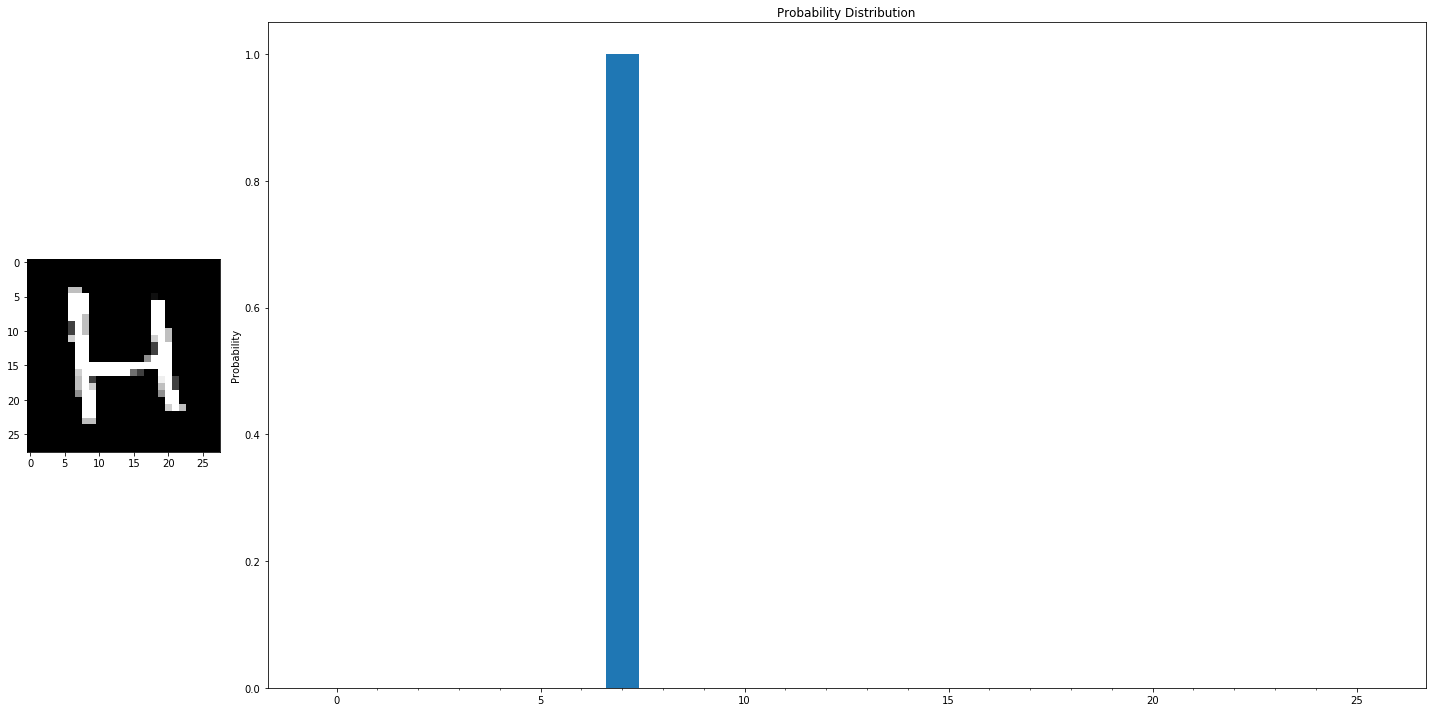

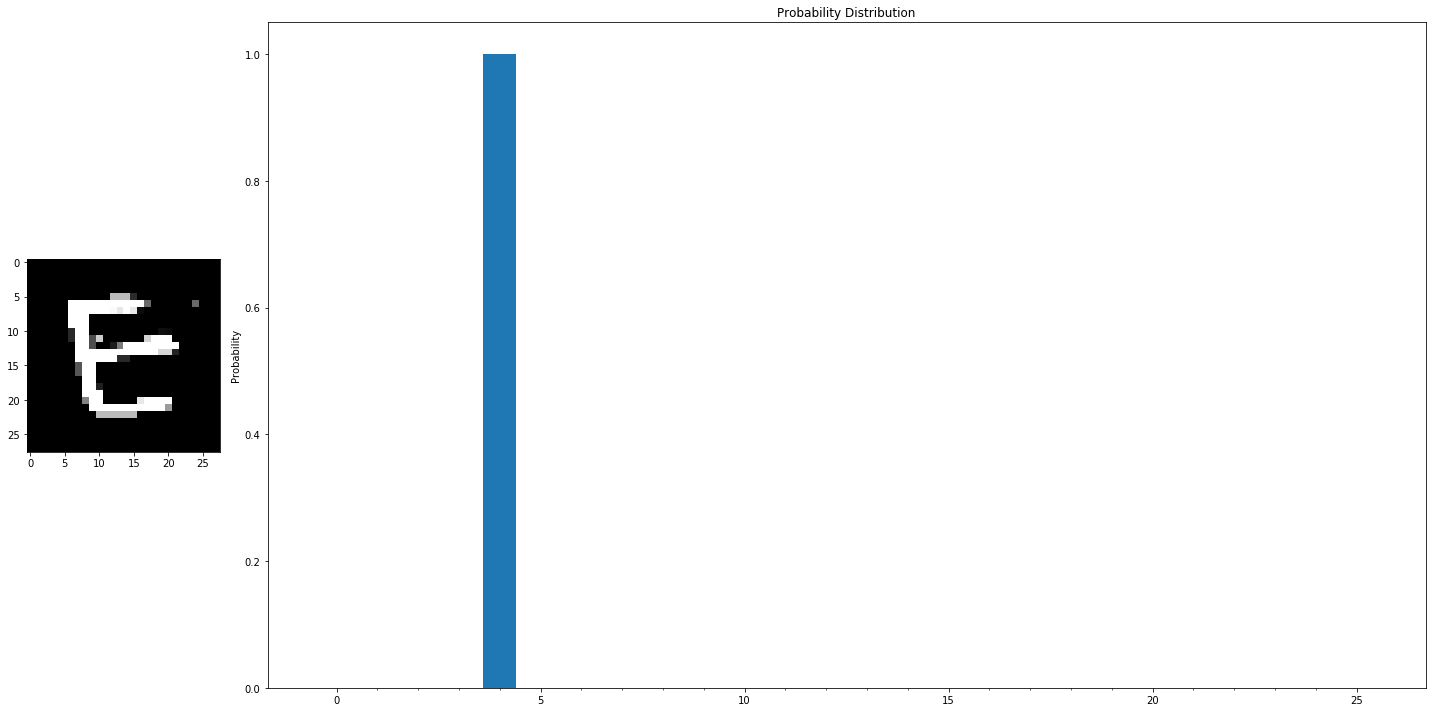

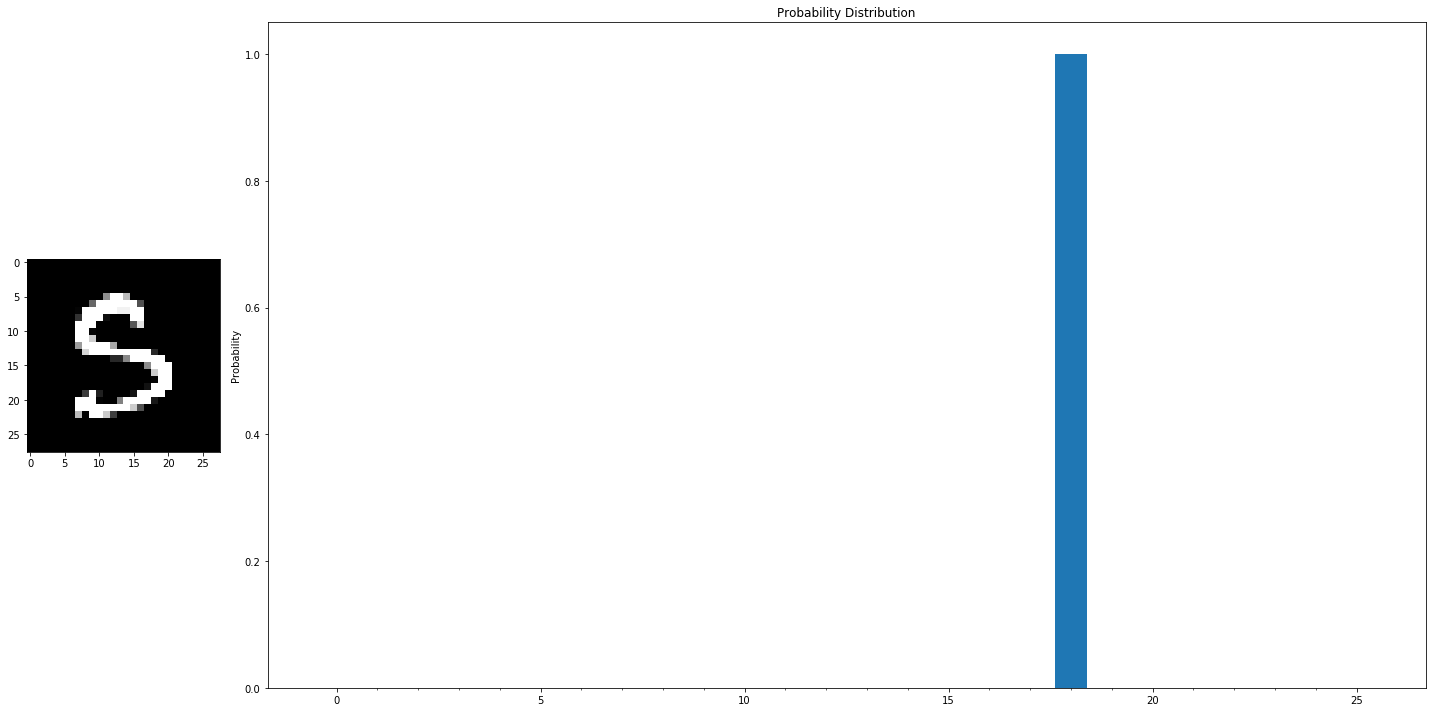

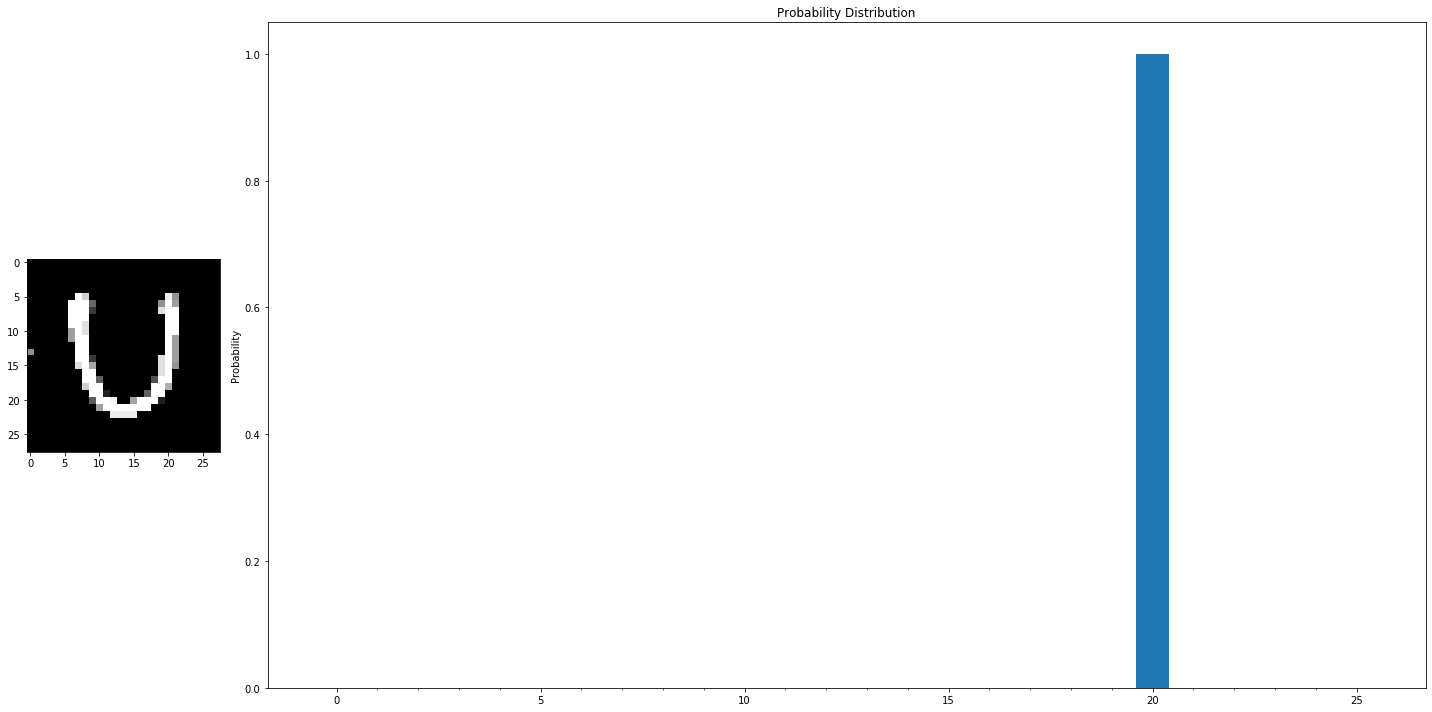

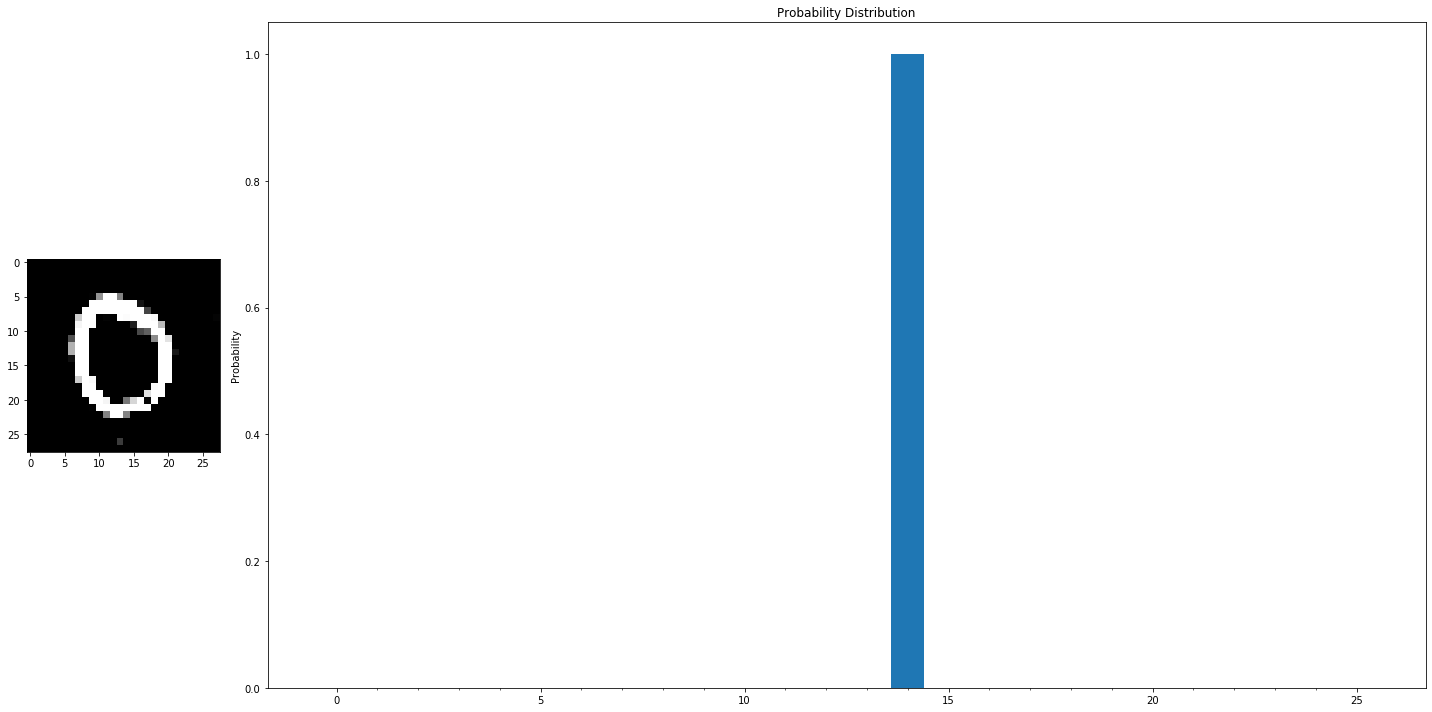

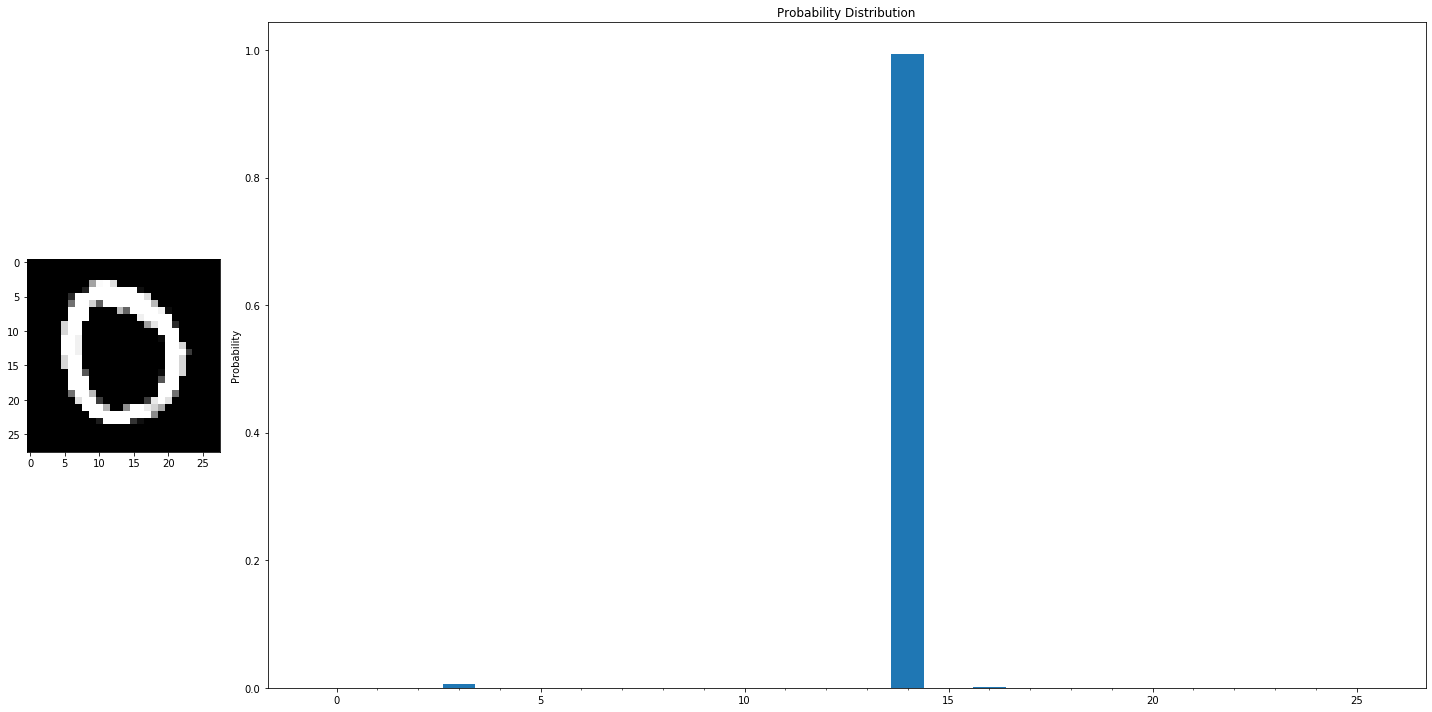

In [21]:
from matplotlib import gridspec
y_pos = np.arange(len(pred[0]))
xtick = [str(i) for i in range(len(pred[0]))]

for i in range(len(images)):
    fig = plt.figure(figsize=(20, 10)) 
    gs = gridspec.GridSpec(1, 2, width_ratios=[0.5, 3]) 
    ax0 = plt.subplot(gs[0])
    ax0.imshow(images[i], cmap='gray')
    ax1 = plt.subplot(gs[1])
    ax1.bar(y_pos, pred[i], align='center', alpha=1)
    ax1.set_xticks(y_pos, xtick)
    ax1.set_ylabel('Probability')
    ax1.set_title('Probability Distribution')
    plt.tight_layout()
    plt.show()